# Multi-Agent Researcher

This notebook demonstrates the multi-agent research approach, which uses a supervisor-researcher collaborative pattern to create comprehensive reports. The system consists of:

1. A **Supervisor Agent** that plans the overall report structure and coordinates work
2. Multiple **Research Agents** that investigate specific topics in parallel
3. A workflow that produces a structured report with introduction, body sections, and conclusion

## From repo 

In [2]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/vankhoa@median.cad/code/github/agent_example/public/open_deep_research


ModuleNotFoundError: No module named 'IPython.extensions.deduperreload'

In [ ]:
! pip install -U -q open-deep-research

# Compile the multi-agent graph

Next, we'll compile the LangGraph workflow for the multi-agent research approach. This step creates the orchestration layer that manages communication between the supervisor and research agents.

In [14]:
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.multi_agent import supervisor_builder

0.0.15


In [15]:
# Create a MemorySaver for checkpointing the agent's state
# This enables tracking and debugging of the multi-agent interaction
checkpointer = MemorySaver()
agent = supervisor_builder.compile(name="research_team", checkpointer=checkpointer)

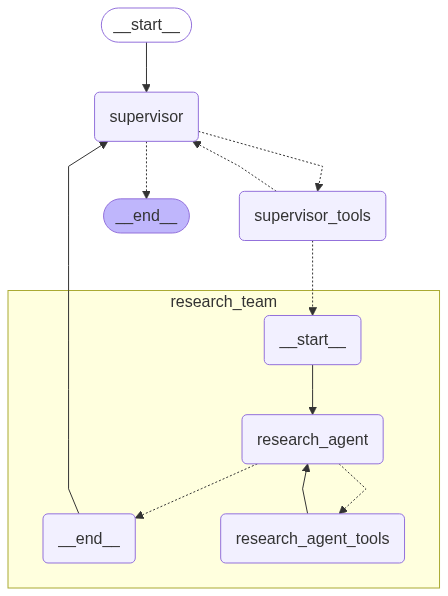

In [16]:
# Visualize the graph structure
# This shows how supervisor and research agents are connected in the workflow
display(Image(agent.get_graph(xray=1).draw_mermaid_png(max_retries=5)))

In [17]:
# Configure and run the multi-agent system
# This sets up the model configuration and executes the research workflow

# Configure models and search API for both supervisor and researcher roles
config = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "tavily",
    "supervisor_model": "groq:llama-3.3-70b-versatile",
    "researcher_model": "groq:llama-3.3-70b-versatile",
    }

# Set up thread configuration with the specified parameters
thread_config = {"configurable": config}

# Define the research topic as a user message
msg = [{"role": "user", "content": "What is model context protocol?"}]

# Run the multi-agent workflow with the specified configuration
response = await agent.ainvoke({"messages": msg}, config=thread_config)

In [18]:
messages = agent.get_state(thread_config).values['messages']
messages[-1].pretty_print()

================================== Ai Message ==================================

<function=tavily_search [{"query": "model context protocol definition", "num_results": 5}]</function>


In [21]:
msg =  [{"role": "user", "content": "Focus on Anthropic‑backed open standard for integrating external context and tools with LLMs, give an architectural overview for developers, tell me about interesting MCP servers, compare to google Agent2Agent (A2A) protocol. write the report and dont ask any follow up questions"}]
response = await agent.ainvoke({"messages": msg}, config=thread_config)
for m in agent.get_state(thread_config).values['messages']:
    m.pretty_print()

================================ Human Message =================================

What is model context protocol?
================================== Ai Message ==================================

<function=tavily_search [{"query": "model context protocol definition", "num_results": 5}]</function>
================================ Human Message =================================

Focus on Anthropic‑backed open standard for integrating external context and tools with LLMs, give an architectural overview for developers, tell me about interesting MCP servers, compare to google Agent2Agent (A2A) protocol. write the report and dont ask any follow up questions
================================ Human Message =================================

Focus on Anthropic‑backed open standard for integrating external context and tools with LLMs, give an architectural overview for developers, tell me about interesting MCP servers, compare to google Agent2Agent (A2A) protocol. write the report and dont ask an

In [22]:
from IPython.display import Markdown
Markdown(agent.get_state(thread_config).values['final_report'])

# Model Context Protocol
The Model Context Protocol (MCP) is an Anthropic-backed open standard for integrating external context and tools with Large Language Models (LLMs). This report provides an architectural overview for developers, highlights interesting MCP servers, and compares the MCP to the Google Agent2Agent (A2A) protocol.



## Conclusion
The Model Context Protocol (MCP) is a powerful tool for integrating external context and tools with Large Language Models (LLMs). With its open standard and Anthropic backing, MCP has the potential to revolutionize the way developers interact with LLMs. The architectural overview provided in this report should give developers a solid foundation for building MCP-compatible applications. The interesting MCP servers highlighted in this report demonstrate the versatility and potential of the protocol. In comparison to the Google Agent2Agent (A2A) protocol, MCP offers a more flexible and customizable solution for integrating external context and tools with LLMs. As the field of LLMs continues to evolve, the Model Context Protocol is likely to play a major role in shaping the future of human-LLM interaction.

Trace: 

> Note: uses 456k tokens 

https://smith.langchain.com/public/f1581fa5-dfc9-445c-a8f4-3518a05cd139/r